In [1]:
import os
import time
import shutil
import pickle

import torch
import torch.nn.functional as F

from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
# from tensorboard_logger import configure, log_value

from model import RecurrentAttention
from utils import AverageMeter

from torchvision import transforms, utils, models
from PIL import Image

import torch

import utils
import data_loader

from trainer import Trainer
from config import get_config

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import pandas as pd

In [2]:
def load_inputs(impath):
    to_tens = transforms.ToTensor()
    return to_tens(Image.open(impath).convert('RGB')).unsqueeze(0)

In [3]:
df = pd.read_csv("../schools/y1314_AllSubjects (1).csv")
df.head()

,school_id,overall_mean,intervention,latitude,longitude
0,104408,154.98,0,15.766944,121.558333
1,104409,162.74,0,15.760000,121.564500
2,104410,156.46,0,15.747778,121.509722
3,104411,133.35,1,15.752500,121.576667
4,104412,141.75,0,15.741944,121.556944


In [4]:
image_paths = []
school_ids = []
ys = []

for i in os.listdir("../schools/imagery/"):
    dta = df[df["school_id"] == int(i.split(".")[0])]
    if len(dta) != 0:
        school_ids.append(i.split(".")[0])
        ys.append(dta['intervention'].values[0])
        image_paths.append("../schools/imagery/" + i)

In [5]:
batch_size = 1

# train = [(load_inputs(image_paths[i]).squeeze()[:, 0:28, 0:28], ys[i]) for i in range(0, 93)]
# val = [(load_inputs(image_paths[i]).squeeze()[:, 0:28, 0:28], ys[i]) for i in range(93, 133)]

train = [(load_inputs(image_paths[i]).squeeze(), ys[i]) for i in range(0, 93)]
val = [(load_inputs(image_paths[i]).squeeze(), ys[i]) for i in range(93, 133)]


train_dl = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
val_dl = torch.utils.data.DataLoader(val, batch_size = batch_size, shuffle = True)

In [6]:
import numpy as np
from utils import plot_images

import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [7]:
# valid_size = .25
# shuffle = True


# normalize = transforms.Normalize((0.1307,), (0.3081,))
# trans = transforms.Compose([transforms.ToTensor(), normalize])

# # load dataset
# dataset = datasets.MNIST("./data/", train=True, download=True, transform=trans)

# num_train = len(dataset)
# indices = list(range(num_train))
# split = int(np.floor(valid_size * num_train))


# if shuffle:
#     np.random.seed(8)
#     np.random.shuffle(indices)

# train_idx, valid_idx = indices[split:], indices[:split]

# train_sampler = SubsetRandomSampler(train_idx)
# valid_sampler = SubsetRandomSampler(valid_idx)

# train_loader = torch.utils.data.DataLoader(
#     dataset,
#     batch_size=batch_size,
#     sampler=train_sampler,
#     num_workers=1,
# )

# valid_loader = torch.utils.data.DataLoader(
#     dataset,
#     batch_size=batch_size,
#     sampler=valid_sampler,
#     num_workers=1,
# )

In [8]:
config, unparsed = get_config()

In [9]:
trainer = Trainer(config, (train_dl, val_dl))

In [10]:
trainer.train()

0.2s - loss: 2.646 - acc: 100.000:   6%|▋         | 6/93 [00:00<00:02, 34.18it/s]


[*] Train on 93 samples, validate on 40 samples

Epoch: 1/200 - LR: 0.000300


2.1s - loss: 1.010 - acc: 0.000: 100%|██████████| 93/93 [00:02<00:00, 44.80it/s]  


train loss: 1.497 - train acc: 55.914 - val loss: 1.075 - val acc: 20.000 - val err: 80.000 [*]


0.2s - loss: 0.957 - acc: 100.000:   6%|▋         | 6/93 [00:00<00:02, 35.18it/s]


Epoch: 2/200 - LR: 0.000300


0.0s - loss: 1.112 - acc: 0.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 1.058 - train acc: 48.387 - val loss: 1.122 - val acc: 20.000 - val err: 80.000

Epoch: 3/200 - LR: 0.000300


0.0s - loss: 0.809 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.995 - train acc: 49.462 - val loss: 1.390 - val acc: 20.000 - val err: 80.000

Epoch: 4/200 - LR: 0.000300


2.1s - loss: 1.145 - acc: 100.000: 100%|██████████| 93/93 [00:02<00:00, 43.88it/s]


train loss: 1.015 - train acc: 41.935 - val loss: 0.935 - val acc: 35.000 - val err: 65.000 [*]


0.2s - loss: 0.949 - acc: 100.000:   5%|▌         | 5/93 [00:00<00:02, 32.59it/s]


Epoch: 5/200 - LR: 0.000300


0.0s - loss: 0.881 - acc: 0.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 1.015 - train acc: 51.613 - val loss: 0.927 - val acc: 20.000 - val err: 80.000

Epoch: 6/200 - LR: 0.000300


2.2s - loss: 0.982 - acc: 0.000: 100%|██████████| 93/93 [00:02<00:00, 43.05it/s]  


train loss: 1.002 - train acc: 50.538 - val loss: 0.965 - val acc: 75.000 - val err: 25.000 [*]


0.2s - loss: 1.128 - acc: 100.000:   6%|▋         | 6/93 [00:00<00:02, 35.12it/s]


Epoch: 7/200 - LR: 0.000300


0.0s - loss: 1.015 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.981 - train acc: 44.086 - val loss: 0.921 - val acc: 35.000 - val err: 65.000

Epoch: 8/200 - LR: 0.000300


1.5s - loss: 0.792 - acc: 0.000:  65%|██████▍   | 60/93 [00:01<00:00, 39.14it/s]  


KeyboardInterrupt: 

In [20]:
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import denormalize, bounding_box

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image


In [21]:
# def bounding_box(x, y, size, color="w"):
# #     x = int(x - (size / 2))
# #     print(x)
# #     y = int(y - (size / 2))
# #     print(y)
#     rect = patches.Rectangle(
#         (x, y), size, size, linewidth=1, edgecolor=color, fill=False
#     )
#     return rect


In [22]:
# % matplotlib inline

In [23]:
def plot(plot_dir, epoch):
    # read in pickle files
    glimpses = pickle.load(open(plot_dir + "g_{}.p".format(epoch), "rb"))
    locations = pickle.load(open(plot_dir + "l_{}.p".format(epoch), "rb"))
    
#     print(locations)

    from ipdb import set_trace

#     set_trace()

    glimpses = np.concatenate(glimpses)

    # grab useful params
    size = int(plot_dir.split("_")[2].split("x")[0])
    num_anims = len(locations)
    num_cols = glimpses.shape[0]
    img_shape = glimpses.shape[2]
    
    print(glimpses.shape)
    print(size)

    # denormalize coordinates
    coords = [denormalize(img_shape, l) for l in locations]
    
    print(coords)

    fig, axs = plt.subplots(nrows=1, ncols=num_cols)
    # fig.set_dpi(100)

    # plot base image
    for j, ax in enumerate(axs.flat):
        ax.imshow(np.transpose(glimpses[j], (1,2,0)), cmap="Greys_r")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    def updateData(i):
        color = "r"
        co = coords[i]
        for j, ax in enumerate(axs.flat):
            for p in ax.patches:
                p.remove()
            c = co[j]
            rect = bounding_box(c[0], c[1], size, color)
            ax.add_patch(rect)

    # animate
    anim = animation.FuncAnimation(
        fig, updateData, frames = num_anims, interval=500, repeat=True
    )

    # save as mp4
    name = plot_dir + "epoch_{}.mp4".format(epoch)
    anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])


In [24]:
# !pip install ipdb

(4, 3, 224, 224)
50
[array([[145.50293 , 100.34091 ],
       [221.84834 ,  39.660313],
       [153.83496 ,  40.129696],
       [198.87746 ,  77.217575]], dtype=float32), array([[224.       ,  49.415104 ],
       [224.       ,  80.16693  ],
       [157.37828  ,   0.       ],
       [160.51224  ,   2.1396885]], dtype=float32), array([[105.02339 ,  62.240715],
       [224.      ,   0.      ],
       [145.88333 ,  29.89967 ],
       [129.78564 ,  45.08103 ]], dtype=float32), array([[217.6265  ,  36.43609 ],
       [112.12981 ,  43.38555 ],
       [153.43689 ,  72.542076],
       [224.      ,   0.      ]], dtype=float32), array([[118.38405 ,   0.      ],
       [224.      ,  29.851671],
       [224.      ,  76.348694],
       [147.50023 ,   0.      ]], dtype=float32), array([[180.73193  ,   4.4790545],
       [207.7357   ,   0.       ],
       [123.64087  ,   3.7052584],
       [224.       ,  50.656975 ]], dtype=float32)]


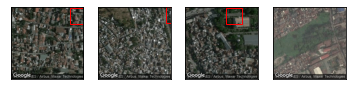

In [25]:
plot("./plots/ram_6_50x50_1/", 28)

In [13]:
for i,o in train_loader:
    hm = i
    
    dsfa

NameError: name 'dsfa' is not defined

In [15]:
import matplotlib.pyplot as plt

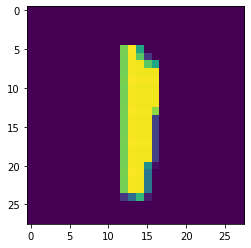

In [16]:
plt.imshow(np.transpose(hm[0], (1,2,0)))

In [17]:
B, C, H, W = hm.shape
size = 8

In [18]:
start[:, 0]

tensor([15.5967, 15.5128, 15.2684, 14.9213, 14.0713, 14.7086, 16.8820, 15.1699])

In [20]:
start = torch.tensor([[15.596725, 15.099442],
       [15.512785, 13.005841],
       [15.268352, 13.694261],
       [14.921265, 14.950024],
       [14.071263, 14.090788],
       [14.708624, 12.661836],
       [16.881996, 14.372852],
       [15.169943, 14.500135]])

# start = start[:, 0]

end = start + size

end

tensor([[23.5967, 23.0994],
        [23.5128, 21.0058],
        [23.2684, 21.6943],
        [22.9213, 22.9500],
        [22.0713, 22.0908],
        [22.7086, 20.6618],
        [24.8820, 22.3729],
        [23.1699, 22.5001]])

In [21]:
hm_padded = F.pad(hm, (size // 2, size // 2, size // 2, size // 2))

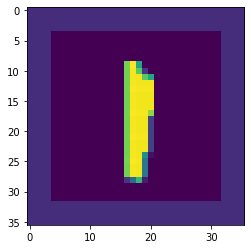

In [22]:
plt.imshow(np.transpose(hm_padded[0], (1,2,0)))

In [25]:
end

tensor([[23.5967, 23.0994],
        [23.5128, 21.0058],
        [23.2684, 21.6943],
        [22.9213, 22.9500],
        [22.0713, 22.0908],
        [22.7086, 20.6618],
        [24.8820, 22.3729],
        [23.1699, 22.5001]])

In [28]:
end[0, 1]

tensor(23.0994)

In [32]:
hm_padded[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]

TypeError: slice indices must be integers or None or have an __index__ method

In [23]:
patch = []
for i in range(B):
    patch.append(hm_padded[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]])

TypeError: only integer tensors of a single element can be converted to an index

In [ ]:
        B, C, H, W = x.shape

        start = self.denormalize(H, l)
        end = start + size

        # pad with zeros
        x = F.pad(x, (size // 2, size // 2, size // 2, size // 2))

        # loop through mini-batch and extract patches
        patch = []
        for i in range(B):
            patch.append(x[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]])
        return torch.stack(patch)

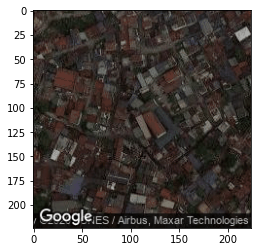

In [30]:
plt.imshow(np.transpose(np.array(train[0][0]), (1,2,0)))#.permute(1,2,0))